# Scenario 1

## Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

### Utility Scores

In [31]:
utility_values = [-5, -1, -10, -2] # [confess, confess], [confess, stay silent], [stay silent, confess], [stay silent, stay silent]
utility_scores = defaultdict(dict)
utility_scores["confess"]["confess"] = -5
utility_scores["confess"]["stay_silent"] = -1
utility_scores["stay_silent"]["confess"] = -10
utility_scores["stay_silent"]["stay_silent"] = -2

* The function will take the probabilty and the action taken by the player.
* Since both the players have the symmteric scores, the function does not take Player as an input
* The plot function will provide a scatter plot for the result


In [32]:
def get_utility(action, prob):
    if action == "confess":
        return utility_values[0]*prob*prob + utility_values[1]*prob*(1-prob)
    else:
        return utility_values[2]*prob*(1-prob) + utility_values[3]*(1-prob)*(1-prob)

def plot(utility_scores, x, title, xlabel, ylabel):
    plt.scatter(x, utility_scores)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Plotting Utility Scores vs Probability

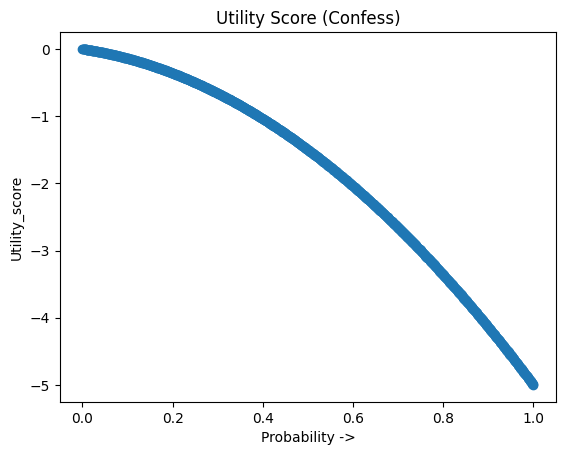

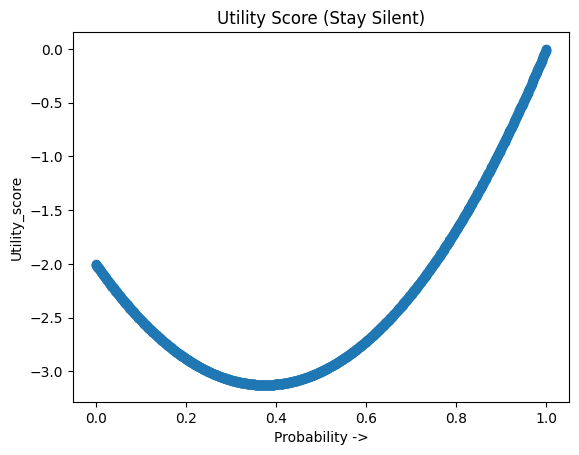

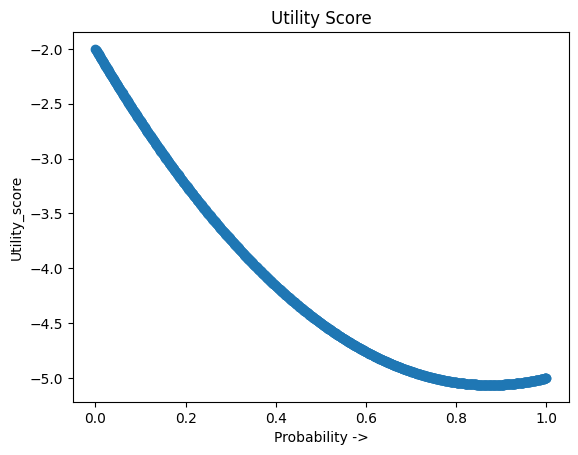

In [43]:
utility_scores_both = [[], []] # [confess, stay_silent]
prob_values = np.linspace(0, 1, 1000)
for p in prob_values:
    score_confess = get_utility("confess", p)
    score_stay_silent = get_utility("stay_silent", p)
    utility_scores_both[0].append(score_confess)
    utility_scores_both[1].append(score_stay_silent)

combined_utility_score = [x+y for x, y in zip(utility_scores_both[0], utility_scores_both[1])]
plot(utility_scores_both[0], prob_values, "Utility Score (Confess)", "Probability ->", "Utility_score")
plot(utility_scores_both[1], prob_values, "Utility Score (Stay Silent)", "Probability ->", "Utility_score")
plot(combined_utility_score, prob_values, "Utility Score", "Probability ->", "Utility_score")

### Inferences
* The overall utility function is a quadratic function in p(probability)
* Confess -> 4*p^2 + p
* Stay Silent -> 6*p - 8*p^2 + 2
* Overall Utility -> -4*p^2 + 7*p + 2
* Note both the players will be having the same graph so plotted only once

### Simulation Parameters

In [34]:
p = 0.4
iterations = 500

### Simulation for Scenario 1

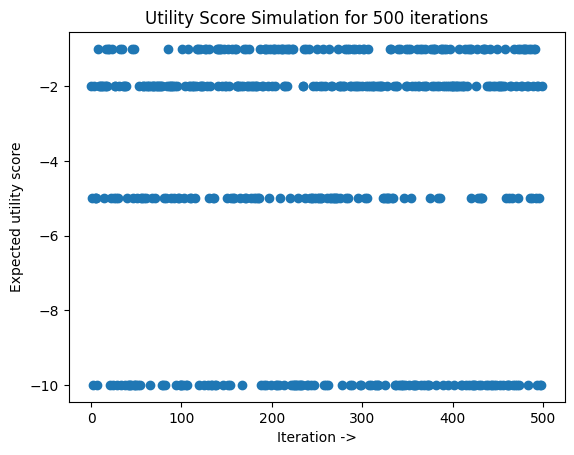

In [35]:
utility_scores_list = []
for _ in range(iterations):
    choice1 = np.random.choice(["confess", "stay_silent"], p=[p, 1-p])
    choice2 = np.random.choice(["confess", "stay_silent"], p=[p, 1-p])
    utility_scores_list.append(utility_scores[choice1][choice2])

steps = np.arange(iterations)
plot(utility_scores_list, steps, f"Utility Score Simulation for {iterations} iterations", "Iteration ->", "Expected utility score")

# Scenario 2

Iteration steps

In [ ]:
iterations = 500

Defining the function to perform min-max choice for the optimal selection

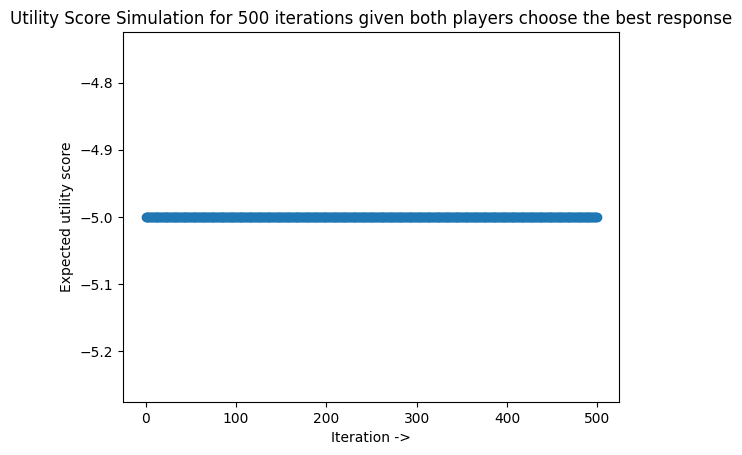

In [46]:
def get_best_choice(utility_scores, player = 1):
    score_confess = min(utility_scores["confess"]["confess"], utility_scores["confess"]["stay_silent"])
    score_stay_silent = min(utility_scores["stay_silent"]["confess"], utility_scores["stay_silent"]["stay_silent"])
    return "confess" if score_confess > score_stay_silent else "stay_silent"

utility_scores_list = []
for _ in range(iterations):
    choice_player_1 = get_best_choice(utility_scores, 1)
    choice_player_2 = get_best_choice(utility_scores, 2)
    utility_scores_list.append(utility_scores[choice_player_1][choice_player_2])

plot(utility_scores_list, steps, f"Utility Score Simulation for {iterations} iterations given both players choose the best response", "Iteration ->", "Expected utility score")



    

### Inferences

The result of each run will not change as the player knows about the matrix. \
The player knows choosing to stay silent for both will be the best outcome \
however if one player decided to choose to stay silent without knowing what other has chosen \
then the other user will know that this will be a possible case and will choose to confess as this \ 
will lead to him/her being sentenced to 1 yr or if both choose to confess then it would be 5 yrs \
In that case the best option will be to confess as choosing to stay silent may lead to the worst possible outcome

# Scenario 3

The function will take the utility matrix as an input and will check for the choice of B given A has chosen \
to stay silent / confess and then B will choose optimally, given that the B is rational we need to find his choice \ 
and then A will think for what will be the best result in either of the case 

In [ ]:
def utility_given_prior_knowledge(utility_matrix):
    # a chooses to confess 
    b_choice = "confess" if utility_scores["confess"]["confess"] > utility_scores["stay_silent"]["confess"] else "stay_silent"
    as_outcome_confess = utility_scores["confess"][b_choice]
    # a chooses to stay silent
    b_choice = "confess" if utility_scores["confess"]["stay_silent"] > utility_scores["stay_silent"]["stay_silent"] else "stay_silent"
    as_outcome_stay_silent = utility_scores["stay_silent"][b_choice]
    return "confess" if as_outcome_confess > as_outcome_stay_silent else "stay_silent"

as_choice = utility_given_prior_knowledge(utility_matrix=utility_scores)
bs_choice = utility_given_prior_knowledge(utility_matrix=utility_scores)
print(f"Prisoner A's choice is {as_choice} and Prisoner B's choice is {bs_choice}")


### Simulation for scenario 3

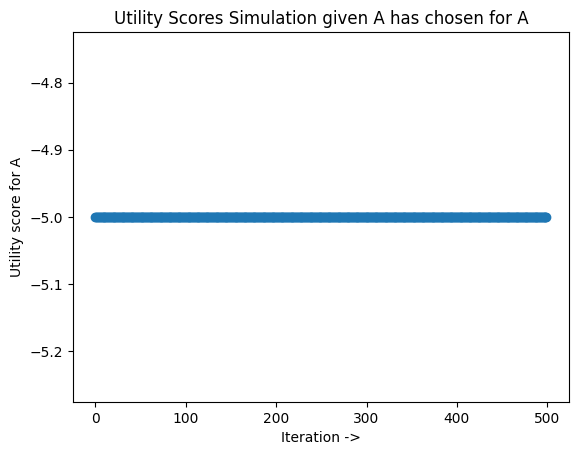

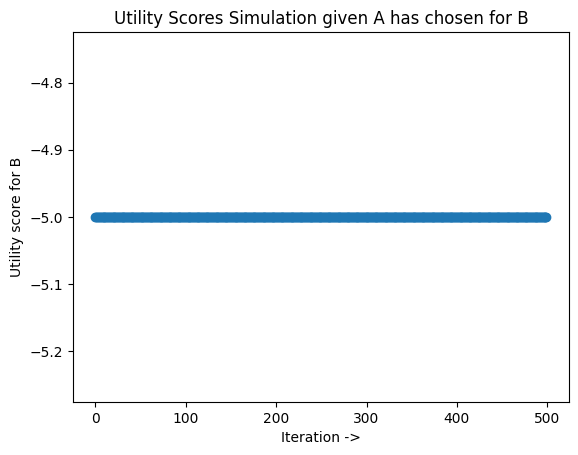

In [45]:
simulations = 500
utility_values = []
for _ in range(simulations):
    as_choice = utility_given_prior_knowledge(utility_matrix=utility_scores)
    bs_choice = utility_given_prior_knowledge(utility_matrix=utility_scores)
    utility_values.append(utility_scores[as_choice][bs_choice])

plot(utility_values, steps, "Utility Scores Simulation given A has chosen for A", "Iteration ->", "Utility score for A")
plot(utility_values, steps, "Utility Scores Simulation given A has chosen for B", "Iteration ->", "Utility score for B")


### Inference
* Player A will choose to confess as choosing it will only result in 5 years of jail in worst case 
* On the other hand if he stays silent, then it will be better for B to confess given that he knows A confessed \ 
which will lead to him having 1 year of jail only 